In [1]:
#Importing the dependencies
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #Very Imp while using images
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)#everytime the neutral network learns it randomly generates parameters
from tensorflow import keras# keras is a wrapper of deep learning libraries
from keras.datasets import mnist
from tensorflow._api.v2.math import confusion_matrix

In [2]:
# LOADING THE IMAGE DATA FROM KERAS>DATASETS
# THE MNIST COMMAND GIVES A TRUPLE OF $ NUMPY ARRAYS CONTAINING XTRAIN YTRAIN XTEST AND YTEST RESPECTIVELY
# HERE ALL PROCESSING ALREADY DONE OTHERWISE WE HAVE TO SCALE AND RESIZE THE IMAGE AND GREYSCALE IT
# HERE WE ARE NOT DOING IT BUT LEARN IT
(X_train,Y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#SHAPE OF THE NUMPY ARRAYS
print(X_train.shape,Y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=60000 images
Test data=10000 images
Image dimension 28X28

In [7]:
#Printing the 8th image
print(X_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

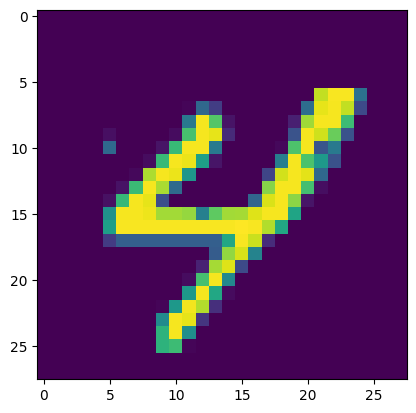

4


In [10]:
#DISPLAYING THE IMAGE
plt.imshow(X_train[89])
plt.show()
print(Y_train[89])

In [12]:
#UNIQUE VALUES IN Y_TRAIN
print(np.unique(Y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
#SCALING THE VALUES
X_train = X_train/255#AS WE HAVE 0 to 255 values in pixels
x_test = x_test/255
# SO AS TO MAKE MAX VALUE BE 1 AND MIN BE 0 TO SCALE THE DATA TO MAKE THE NEURAL NETWORK UNDERSTAND IT BETTER

In [14]:
print(X_train[89])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
#BUILDING THE NEURAL NETWORKS(HERE WE AS USING BASIC NEURAL NETWORK NOT CNN)
# SETTING UP LAYERS
model= tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(70,activation='relu'),
        tf.keras.layers.Dense(50,activation='relu'),
        tf.keras.layers.Dense(50,activation='relu'),
        tf.keras.layers.Dense(30,activation='relu'),
        tf.keras.layers.Dense(30,activation='relu'),
        tf.keras.layers.Dense(10,activation='sigmoid')
    ]
)

In [18]:
#COMPILING THE MODEL
#FOR OPTIMAL VALUES
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [19]:
#TRAINING
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3168 - accuracy: 0.9059
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1357 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0990 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

WE GOT A TRAINING DATA ACCURACY OF **98.88%**

NOW WE WILL CHECK THE OVERFITTING BY USING TEST DATA

In [21]:
#TESTING THE TEST DATA
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9717
0.9717000126838684


TEST DATA ACCURACY **97.17%**

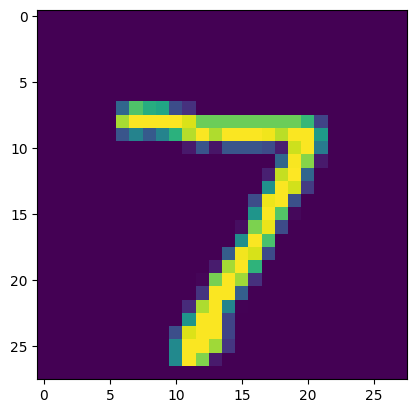

In [22]:
#first datapoint in x_test
plt.imshow(x_test[0])
plt.show()

In [23]:
print(y_test[0])

7


In [24]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [25]:
print(y_pred[0]) # IT BASICALLY GIVES THE PROBABLITY OF THE IMAGE BEING 0 1 ....9 WE SEE 7 HAS THE HIGHEST PROBABILITY

[2.2473691e-04 2.7837228e-02 1.4123933e-01 8.3348751e-01 1.5716471e-03
 2.6403874e-02 2.4150560e-05 9.9914360e-01 2.6925145e-02 1.1641235e-01]


In [27]:
# CONVERTING THE PREDICTION PROBABILITIES TO CLASS LABEL
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [28]:
# CONVERTING THE PREDICTION PROBABILITY OF ALL THE PREDICTIONS
Y_pred_labels=[np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_TEST-> TRUE LABELS
Y_pred_labels-> Predicted labels

In [31]:
# CREATING THE CONFUSION MATRIX
conf_mat= confusion_matrix(y_test,Y_pred_labels)

In [32]:
print(conf_mat)

tf.Tensor(
[[ 967    0    1    1    0    2    6    0    2    1]
 [   0 1123    0    6    0    0    2    0    3    1]
 [   2    4  993   18    3    1    0    5    6    0]
 [   0    0    0 1001    0    2    0    5    0    2]
 [   1    1    2    1  968    2    3    0    0    4]
 [   1    0    0   25    0  854    3    1    7    1]
 [   0    3    1    2    2   10  934    3    3    0]
 [   1    5    5    8    1    0    0  996    3    9]
 [   1    0    3   12    6    5    2    6  937    2]
 [   3    2    0    6   35    5    0   10    4  944]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'PTREDICTED LABELS')

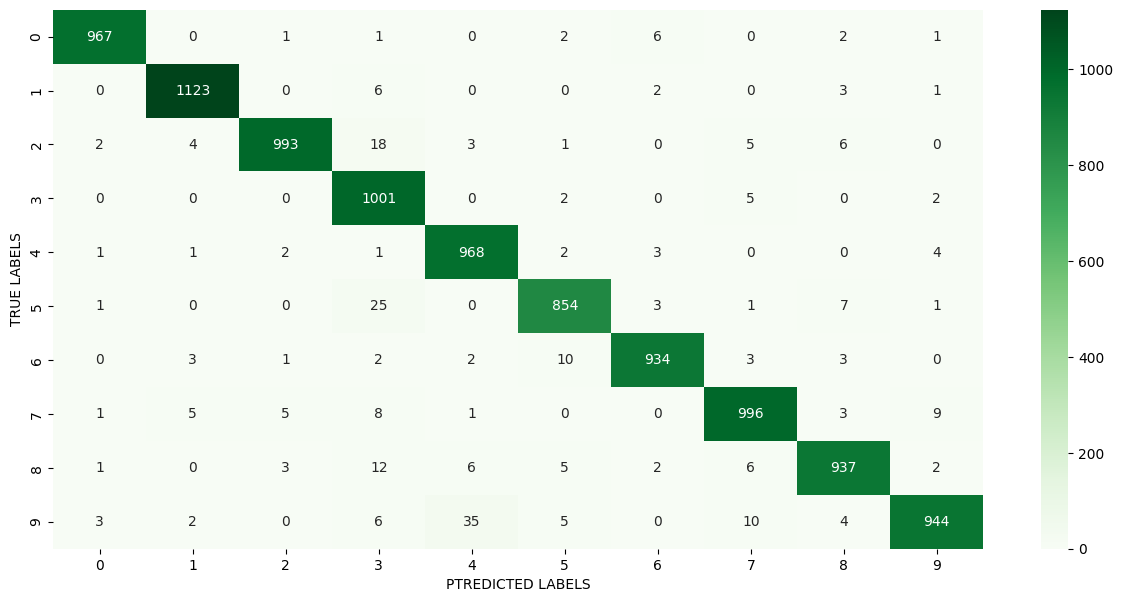

In [37]:
# WE CAN BUILD A HEAT MAP WITH ALL THESE VALUES
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens')
plt.ylabel("TRUE LABELS")
plt.xlabel("PREDICTED LABELS")

**THIS HEAT MAP SHOWS THAT
if an image is 1 or any other class how many times model predicted what and so on**